In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, auc
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("phishing website dataset.csv")
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [4]:
df.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [5]:
df.duplicated().sum()

np.int64(5206)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [9]:
df.reset_index(drop=True, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5849 entries, 0 to 5848
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            5849 non-null   int64
 1   URL_Length                   5849 non-null   int64
 2   Shortining_Service           5849 non-null   int64
 3   having_At_Symbol             5849 non-null   int64
 4   double_slash_redirecting     5849 non-null   int64
 5   Prefix_Suffix                5849 non-null   int64
 6   having_Sub_Domain            5849 non-null   int64
 7   SSLfinal_State               5849 non-null   int64
 8   Domain_registeration_length  5849 non-null   int64
 9   Favicon                      5849 non-null   int64
 10  port                         5849 non-null   int64
 11  HTTPS_token                  5849 non-null   int64
 12  Request_URL                  5849 non-null   int64
 13  URL_of_Anchor                5849 non-null   int

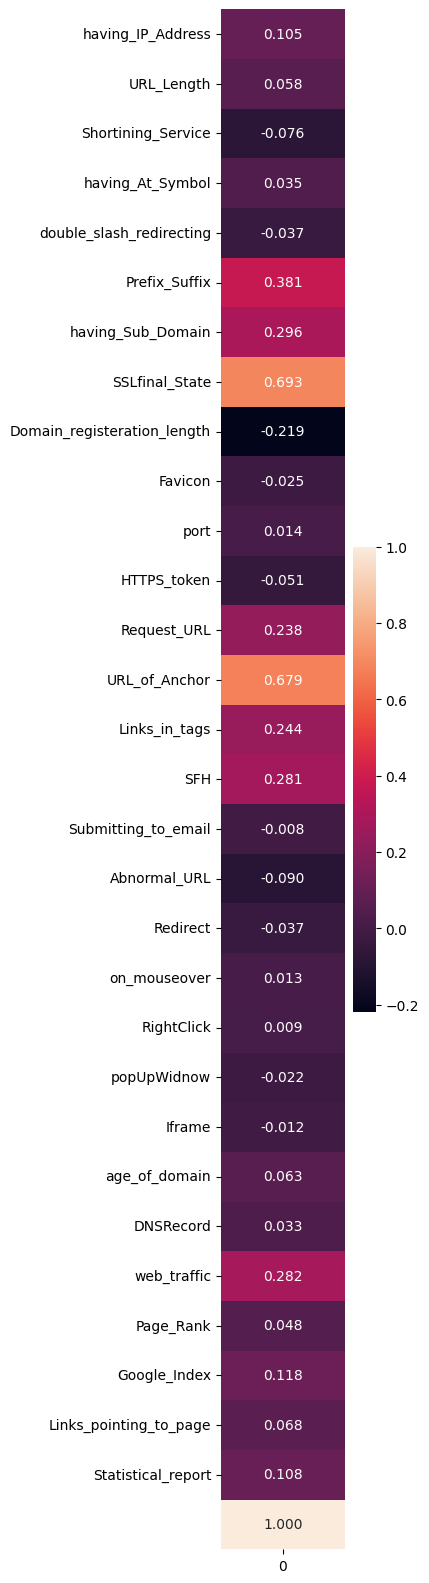

In [20]:
plt.figure(figsize=(2, 20))
sns.heatmap(np.array([df.corr()["Result"].tolist()]).T, yticklabels=df.columns[:-1], annot=True, fmt=".3f")
plt.show()

In [23]:
sorted(np.abs(np.array([df.corr()["Result"].tolist()]).T), reverse=True)[1:]

[array([0.69322837]),
 array([0.67912499]),
 array([0.38113434]),
 array([0.296214]),
 array([0.28170945]),
 array([0.28113107]),
 array([0.24386358]),
 array([0.23777806]),
 array([0.21862317]),
 array([0.11821733]),
 array([0.10848556]),
 array([0.10495226]),
 array([0.09004329]),
 array([0.07616596]),
 array([0.06846309]),
 array([0.06279959]),
 array([0.05822782]),
 array([0.05141225]),
 array([0.04813974]),
 array([0.03746213]),
 array([0.03669323]),
 array([0.03475693]),
 array([0.0332037]),
 array([0.02545675]),
 array([0.02245524]),
 array([0.01420086]),
 array([0.01279011]),
 array([0.01175563]),
 array([0.00928591]),
 array([0.00801393])]

In [25]:
for i in df.columns[:-1]:
    print(pd.crosstab(df[i], df["Result"]))
    print("=="*50)

Result               -1     1
having_IP_Address            
-1                 1461  1075
 1                 1558  1755
Result        -1     1
URL_Length            
-1          2476  2202
 0            59    37
 1           484   591
Result                -1     1
Shortining_Service            
-1                   345   473
 1                  2674  2357
Result              -1     1
having_At_Symbol            
-1                 662   541
 1                2357  2289
Result                      -1     1
double_slash_redirecting            
-1                         388   436
 1                        2631  2394
Result           -1     1
Prefix_Suffix            
-1             3019  2129
 1                0   701
Result               -1     1
having_Sub_Domain            
-1                 1045   658
 0                 1425   633
 1                  549  1539
Result            -1     1
SSLfinal_State            
-1              1864   264
 0               714     7
 1             

In [26]:
cols = df.columns

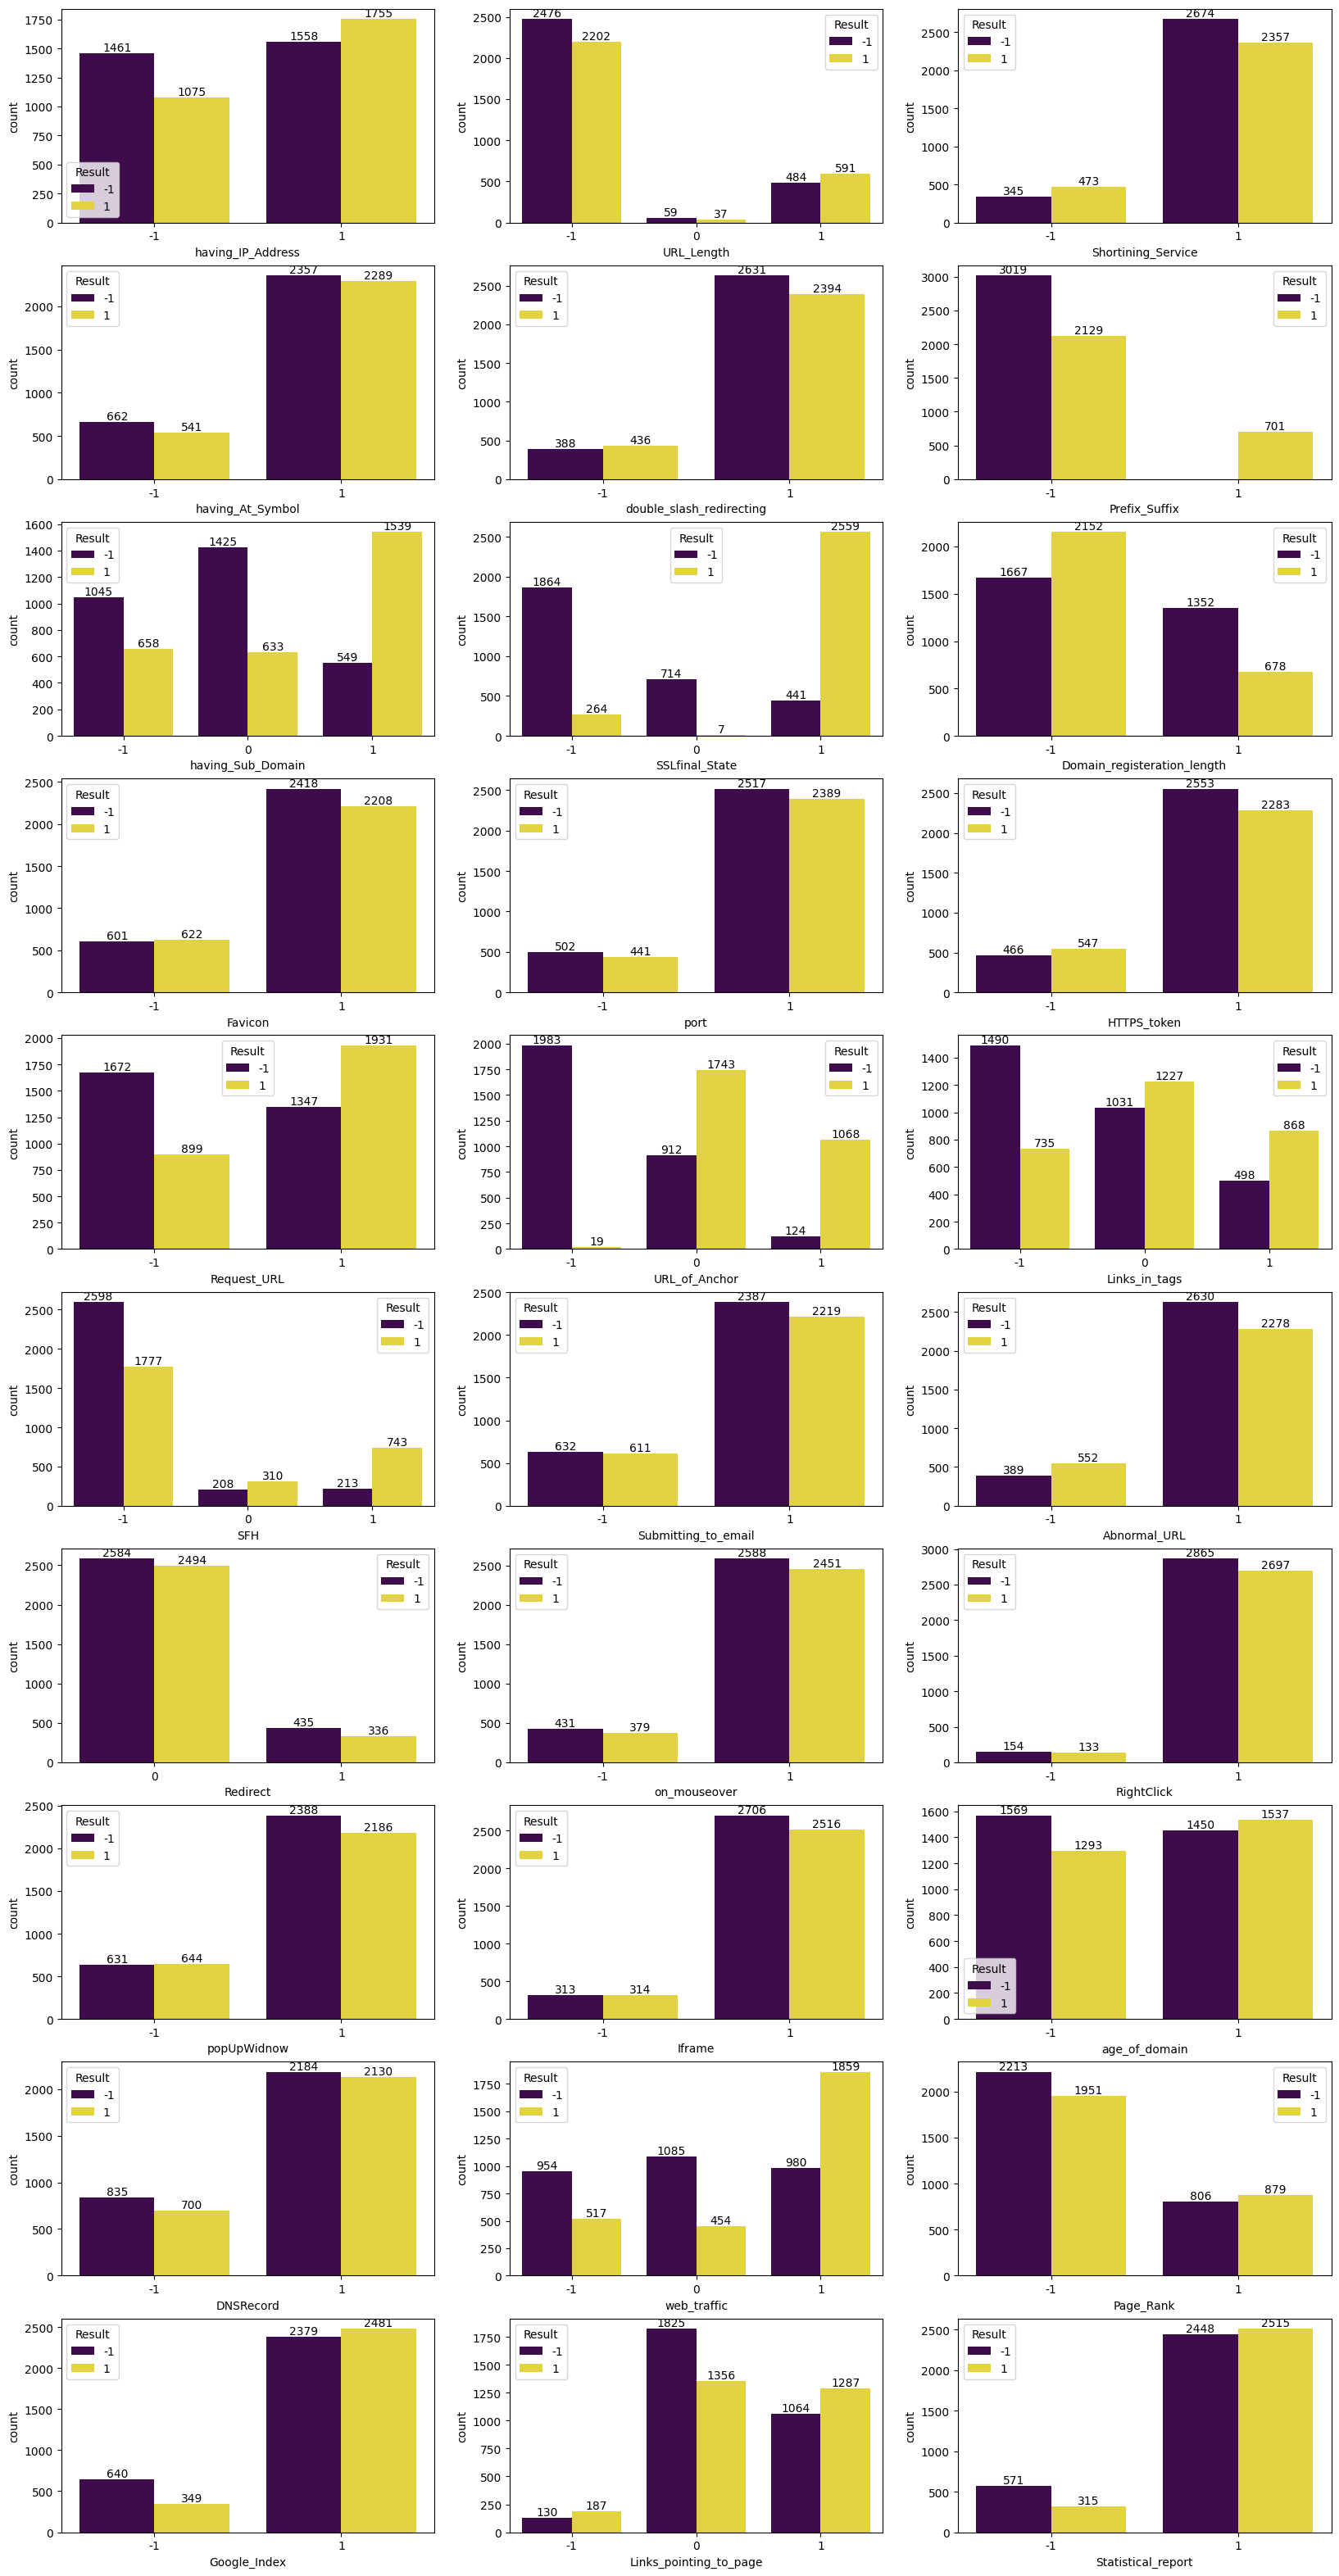

In [30]:
plt.figure(figsize=(20, 40))
for i in range(30):
    plt.subplot(10, 3, i+1)
    ax = sns.countplot(df, x=cols[i], hue="Result", palette="viridis")
    for bars in ax.containers:
        ax.bar_label(bars)
plt.show()

In [31]:
X = df.drop("Result", axis=1)
y = df["Result"]

In [32]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.7, random_state=23)

In [33]:
pca = PCA(n_components=0.95)

In [34]:
tr_com = pca.fit_transform(X_tr)

In [35]:
tr_com.shape

(4094, 22)

In [36]:
te_com = pca.transform(X_te)

In [37]:
te_com.shape

(1755, 22)

In [40]:
models = [LogisticRegression(),
          SVC(),
          BernoulliNB(), 
          KNeighborsClassifier(n_neighbors=11),
          DecisionTreeClassifier(max_depth=7), 
          RandomForestClassifier(max_depth=5), 
          AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2), n_estimators=150)]

In [44]:
for i in models:
    print("Model =", i)
    i.fit(tr_com, y_tr)
    print("Training Score ", i.score(tr_com, y_tr))
    pred = i.predict(te_com)
    print("Testing Score =", accuracy_score(y_te, pred))
    print("Precission Score =", precision_score(y_te, pred))
    print("Recall Score =", recall_score(y_te, pred))
    print("F1 Score =", f1_score(y_te, pred))
    print("=="*100)

Model = LogisticRegression()
Training Score  0.9198827552515877
Testing Score = 0.9190883190883191
Precission Score = 0.9177592371871275
Recall Score = 0.9134045077105575
F1 Score = 0.915576694411415
Model = SVC()
Training Score  0.9506595017098193
Testing Score = 0.9373219373219374
Precission Score = 0.9246813441483198
Recall Score = 0.9466192170818505
F1 Score = 0.9355216881594373
Model = BernoulliNB()
Training Score  0.7889594528578407
Testing Score = 0.7720797720797721
Precission Score = 0.7765293383270911
Recall Score = 0.7378410438908659
F1 Score = 0.7566909975669099
Model = KNeighborsClassifier(n_neighbors=11)
Training Score  0.9318514899853444
Testing Score = 0.9207977207977208
Precission Score = 0.9210526315789473
Recall Score = 0.9134045077105575
F1 Score = 0.9172126265634306
Model = DecisionTreeClassifier(max_depth=7)
Training Score  0.9342940889106008
Testing Score = 0.9065527065527066
Precission Score = 0.9046483909415971
Recall Score = 0.900355871886121
F1 Score = 0.90249

In [59]:
model_eval = {}

In [60]:
for i in range(len(models)):
    m = models[i]
    m.fit(tr_com, y_tr)
    pred = m.predict(te_com)
    tn, fp, fn, tp = confusion_matrix(y_te, pred).ravel()
    ls = [m.__class__.__name__, m.score(tr_com, y_tr), tp, tn, fp, fn, accuracy_score(y_te, pred), precision_score(y_te, pred),
         recall_score(y_te, pred), f1_score(y_te, pred)]
    model_eval[i] = ls

In [61]:
model_evaluation_df = pd.DataFrame(model_eval.values(),
                                  columns=["Model", "Training Score", 
                                   "TP", "TN", "FP", "FN", "Accuracy", 
                                   "Precision", "Recall", "F1 Score"])

In [62]:
model_evaluation_df

,Model,Training Score,TP,TN,FP,FN,Accuracy,Precision,Recall,F1 Score
0,LogisticRegression,0.919883,770,843,69,73,0.919088,0.917759,0.913405,0.915577
1,SVC,0.950660,798,847,65,45,0.937322,0.924681,0.946619,0.935522
2,BernoulliNB,0.788959,622,733,179,221,0.772080,0.776529,0.737841,0.756691
3,KNeighborsClassifier,0.931851,770,846,66,73,0.920798,0.921053,0.913405,0.917213
4,DecisionTreeClassifier,0.934294,758,828,84,85,0.903704,0.900238,0.899170,0.899703
5,RandomForestClassifier,0.930874,766,853,59,77,0.922507,0.928485,0.908660,0.918465
6,AdaBoostClassifier,0.962628,770,851,61,73,0.923647,0.926594,0.913405,0.919952


<function matplotlib.pyplot.show(close=None, block=None)>

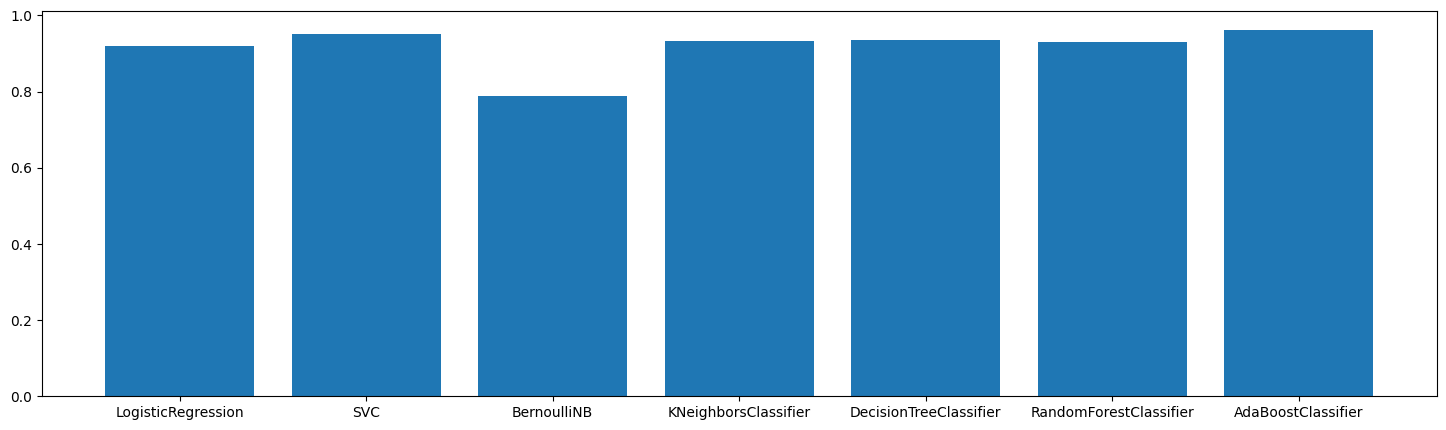

In [69]:
plt.figure(figsize=(18, 5))
plt.bar(model_evaluation_df["Model"], model_evaluation_df["Training Score"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

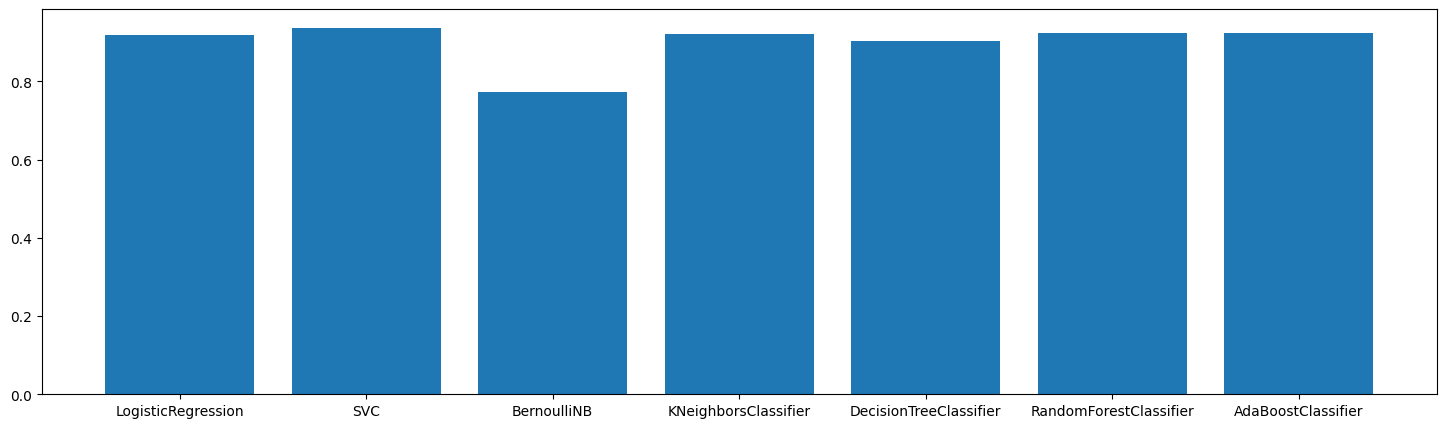

In [70]:
plt.figure(figsize=(18, 5))
plt.bar(model_evaluation_df["Model"], model_evaluation_df["Accuracy"])
plt.show

In [71]:
model = SVC()

In [72]:
model.fit(tr_com, y_tr)

SVC()

In [73]:
import pickle

In [74]:
with open("Support_Vector_Machine_Model.pkl" , "wb") as file:
    pickle.dump(model, file)

In [75]:
with open("Support_Vector_Machine_Model.pkl" , "rb") as file:
    pkl_model = pickle.load(file)

In [76]:
pkl_model.predict(te_com)

array([-1,  1, -1, ..., -1,  1,  1], shape=(1755,))